## Introduction

In this notebook, we demonstrate how to use PaSDqc to find sub-chromosomal regions of aberrant amplification. This analysis requires ```.map.pos.cov``` files of depth at uniquely mappable positions as generated by PaSDqc. By default, these intermediate files are deleted after PSD inference, but the files can be kept by supplying ```--noclean``` to PaSDqc. You can also regenerate these files by running ```PaSDqc extract [options]```.

By default, these files will be stored in ```cov/``` in the output directory, with one file per chromosome per sample (22 files per sample). Be sure to move all of the files for a given sample to their own directory prior to running the blacklist analysis.

In [1]:
import PaSDqc
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pathlib

%matplotlib inline
%load_ext autoreload
%autoreload 2

In [2]:
sns.set_context('poster')
sns.set_style("ticks", {'ytick.minor.size': 0.0, 'xtick.minor.size': 0.0})

### Analyze MN1a from Zhang et al, 2015
The directory contains only coverage data for chr1, so only that chromosome is analyzed. If the dir contained data for other chromosomes, those would be analyzed as well.

In [3]:
chr1_MN1a = PaSDqc.PSDTools.RegionPSD.analyze("../data/Zhang_2015/cov/", build='grch37', l_region=1e7, l_seg=5e5, min_freq=5e-4)

Analyzing ../data/Zhang_2015/cov/MN1a.chr1.map.pos.cov
p arm
q arm


In [4]:
chr1_MN1a.KL_div()
chr1_MN1a.kl['chr1']

17322           0.322482
10017322        0.947925
20017322        0.156394
30017322        0.192707
40017322        0.069961
50017322        0.087900
60017322        0.057109
70017322        0.092547
80017322        0.083437
90017322        0.355629
100017322       0.108195
110017322    2310.206473
142535448       1.112230
152535448       0.087865
162535448       0.197023
172535448       0.079016
182535448       0.199471
192535448       0.339410
202535448       0.093177
212535448       0.242108
222535448       0.048810
232535448       0.071086
dtype: float64

In [5]:
# Load the raw read depth
df_MN1a = pd.read_table("../data/Zhang_2015/cov/MN1a.chr1.map.pos.cov", names=['chr', 'pos', 'depth'])

###  Analyze 1465 MDA 30 from Lodato et al, 2015
The directory contains only coverage data for chr1, so only that chromosome is analyzed.

In [6]:
chr1_1465 = PaSDqc.PSDTools.RegionPSD.analyze("../data/Lodato_2015/1465/cov/", build='grch37', l_region=1e7, l_seg=5e5, min_freq=5e-4)

Analyzing ../data/Lodato_2015/1465/cov/1465_MDA_30.chr1.map.pos.cov
p arm
q arm


In [7]:
chr1_1465.KL_div()
chr1_1465.kl['chr1']

66379        2.399243
10066379     3.132991
20066379     2.586372
30066379     0.427203
40066379     0.151339
50066379     0.062027
60066379     0.052085
70066379     0.330537
80066379     0.072908
90066379     0.070735
100066379    0.344063
110066379    0.054991
142542433    0.155017
152542433    0.246623
162542433    0.102889
172542433    0.095505
182542433    0.480495
192542433    0.089984
202542433    0.546900
212542433    0.103343
222542433    0.074400
232542433    0.081692
dtype: float64

In [8]:
# Load the raw read depth
df_1465= pd.read_table("../data/Lodato_2015/1465/cov/1465_MDA_30.chr1.map.pos.cov", names=['chr', 'pos', 'depth'])

### Make the figure

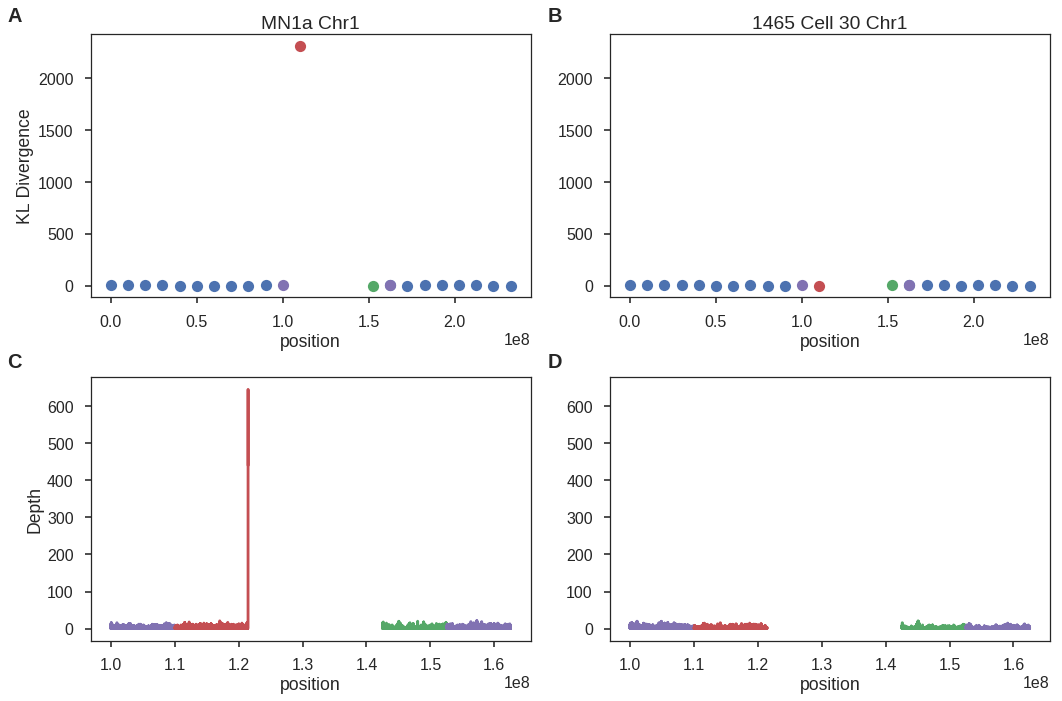

In [9]:
f = plt.figure(figsize=(15, 10))
ax0 = f.add_subplot(221)
ax1 = f.add_subplot(223)
ax2 = f.add_subplot(222, sharex=ax0, sharey=ax0)
ax3 = f.add_subplot(224, sharex=ax1, sharey=ax1)

cp = sns.color_palette()
ax0.plot(chr1_MN1a.kl['chr1'][:10], 'o')
ax0.plot(chr1_MN1a.kl['chr1'][14:], 'o', color=cp[0])
ax0.plot(chr1_MN1a.kl['chr1'].index[10], chr1_MN1a.kl['chr1'][10], 'o', color=cp[3])
ax0.plot(chr1_MN1a.kl['chr1'].index[11], chr1_MN1a.kl['chr1'][11], 'o', color=cp[2])
ax0.plot(chr1_MN1a.kl['chr1'].index[13], chr1_MN1a.kl['chr1'][13], 'o', color=cp[1])
ax0.plot(chr1_MN1a.kl['chr1'].index[14], chr1_MN1a.kl['chr1'][14], 'o', color=cp[3])
ax0.set_ylabel('KL Divergence')
ax0.set_xlabel('position')

ax1.plot(df_MN1a.pos[(df_MN1a.pos >= 100017322) & (df_MN1a.pos <= 110017322)], df_MN1a.depth[(df_MN1a.pos >= 100017322) & (df_MN1a.pos <= 110017322)], color=cp[3])
ax1.plot(df_MN1a.pos[(df_MN1a.pos >= 110017322) & (df_MN1a.pos <= 121485368)], df_MN1a.depth[(df_MN1a.pos >= 110017322) & (df_MN1a.pos <= 121485368)], color=cp[2])
ax1.plot(df_MN1a.pos[(df_MN1a.pos >= 142535448) & (df_MN1a.pos <= 152535448)], df_MN1a.depth[(df_MN1a.pos >= 142535448) & (df_MN1a.pos <= 152535448)], color=cp[1])
ax1.plot(df_MN1a.pos[(df_MN1a.pos >= 152535448) & (df_MN1a.pos <= 162535448)], df_MN1a.depth[(df_MN1a.pos >= 152535448) & (df_MN1a.pos <= 162535448)], color=cp[3])
ax1.set_ylabel('Depth')
ax1.set_xlabel('position')

ax2.plot(chr1_1465.kl['chr1'][:10], 'o')
ax2.plot(chr1_1465.kl['chr1'][14:], 'o', color=cp[0])
ax2.plot(chr1_1465.kl['chr1'].index[10], chr1_1465.kl['chr1'][10], 'o', color=cp[3])
ax2.plot(chr1_1465.kl['chr1'].index[11], chr1_1465.kl['chr1'][11], 'o', color=cp[2])
ax2.plot(chr1_1465.kl['chr1'].index[13], chr1_1465.kl['chr1'][13], 'o', color=cp[1])
ax2.plot(chr1_1465.kl['chr1'].index[14], chr1_1465.kl['chr1'][14], 'o', color=cp[3])
# ax2.set_ylabel('KL Divergence')
ax2.set_xlabel('position')

ax3.plot(df_1465.pos[(df_1465.pos >= 100017322) & (df_1465.pos <= 110017322)], df_1465.depth[(df_1465.pos >= 100017322) & (df_1465.pos <= 110017322)], color=cp[3])
ax3.plot(df_1465.pos[(df_1465.pos >= 110017322) & (df_1465.pos <= 121485368)], df_1465.depth[(df_1465.pos >= 110017322) & (df_1465.pos <= 121485368)], color=cp[2])
ax3.plot(df_1465.pos[(df_1465.pos >= 142535448) & (df_1465.pos <= 152535448)], df_1465.depth[(df_1465.pos >= 142535448) & (df_1465.pos <= 152535448)], color=cp[1])
ax3.plot(df_1465.pos[(df_1465.pos >= 152535448) & (df_1465.pos <= 162535448)], df_1465.depth[(df_1465.pos >= 152535448) & (df_1465.pos <= 162535448)], color=cp[3])
# ax3.set_ylabel('Depth')
ax3.set_xlabel('position')

ax0.set_title('MN1a Chr1')
ax2.set_title('1465 Cell 30 Chr1')

f.text(0.01, 0.97, "A", weight="bold", horizontalalignment='left', verticalalignment='center', fontsize=20)
f.text(0.51, 0.97, "B", weight="bold", horizontalalignment='left', verticalalignment='center', fontsize=20)
#f.text(0.49, 0.66, "C", weight="bold", horizontalalignment='left', verticalalignment='center', fontsize=20)
f.text(0.01, 0.49, "C", weight="bold", horizontalalignment='left', verticalalignment='center', fontsize=20)
f.text(0.51, 0.49, "D", weight="bold", horizontalalignment='left', verticalalignment='center', fontsize=20)

plt.tight_layout()